# Lab 5: Supervised Learning Algorithm: Decision Tree and it's performance metrics


## Supervised Learning

A type of machine learning where models are trained using labeled data to make predictions or classifications. It enables accurate predictions based on learned patterns in the data.

## Classification vs Regression Problem

Classification predicts discrete labels (e.g., spam or not), while regression predicts continuous values (e.g., house prices). It distinguishes the types of prediction tasks, guiding model selection.

## Decision Tree

A tree-like model used for classification and regression, splitting data based on features to make predictions. It is easy to interpret and can handle both categorical and numerical data.

## Entropy

A measure of uncertainty or randomness in a dataset. Higher entropy means more disorder. It is used in decision trees to decide the best feature for splitting the data.

## Information Gain

The reduction in entropy after splitting a dataset based on a feature. It helps in selecting the best features for decision tree splits, improving model.

### $ Entropy = \sum_{i}\;-P_{i}log_{2}P_{i} $    ,   $\;\;\;\;\;\;$ 
$ where  P_{i} \; is \;  the \; probability\; of\; class \;i$

#### Information Gain = Entropy(Parent) - [average entropy (children)]

## Node Selection Based on Information Gain

In decision trees, nodes are selected based on the feature that provides the highest information gain, i.e. the greatest reduction in entropy. Insures that the most informative features are used for splitting, improving the tree's predictive power.

## Overfitting

A model fits the training data too closely, capturing noise and outliers, leading to poor generalization on new data. It reduces model performance on unseen data, making it less useful in real-world applications.

## Underfitting

A model is too simple and fails to capture the underlying patterns in the data, resulting in poor performance on both training and test sets. It leads to inaccurate predictions because the model doesn't learn enough from the data.


---


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics

In [2]:
dbts_new = pd.read_csv('dataset/imputed_data_diabetes1.csv')
dbts_new.head()

,Unnamed: 0,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,Diabetic
0,0,1,85.0,66.0,29.000000,125.0,26.6,0.351,31,0
1,1,8,183.0,64.0,29.142593,125.0,23.3,0.672,32,1
2,2,1,89.0,66.0,23.000000,94.0,28.1,0.167,21,0
3,3,0,137.0,40.0,35.000000,168.0,43.1,2.288,33,1
4,4,5,116.0,74.0,29.142593,125.0,25.6,0.201,30,0


In [3]:
X = dbts_new.iloc[:, :-1].values  # All columns except the last one as features
Y = dbts_new.iloc[:, -1].values   # Last column as the label

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Now, lets apply the cleaned data into one of the learning algorithm called Decision Tree using sklearn library.

In [4]:
# Train a Decision Tree classifier
algo = DecisionTreeClassifier(
    criterion="entropy", random_state=42, max_depth=4, min_samples_leaf=5)
algo.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       random_state=42)

In [5]:
result = algo.score(X_test, Y_test)
print(f"The Decision Tree model has an accuracy of: {result * 100:.3f}%")

The Decision Tree model has an accuracy of: 75.974%


#### Plotting the Decision Tree

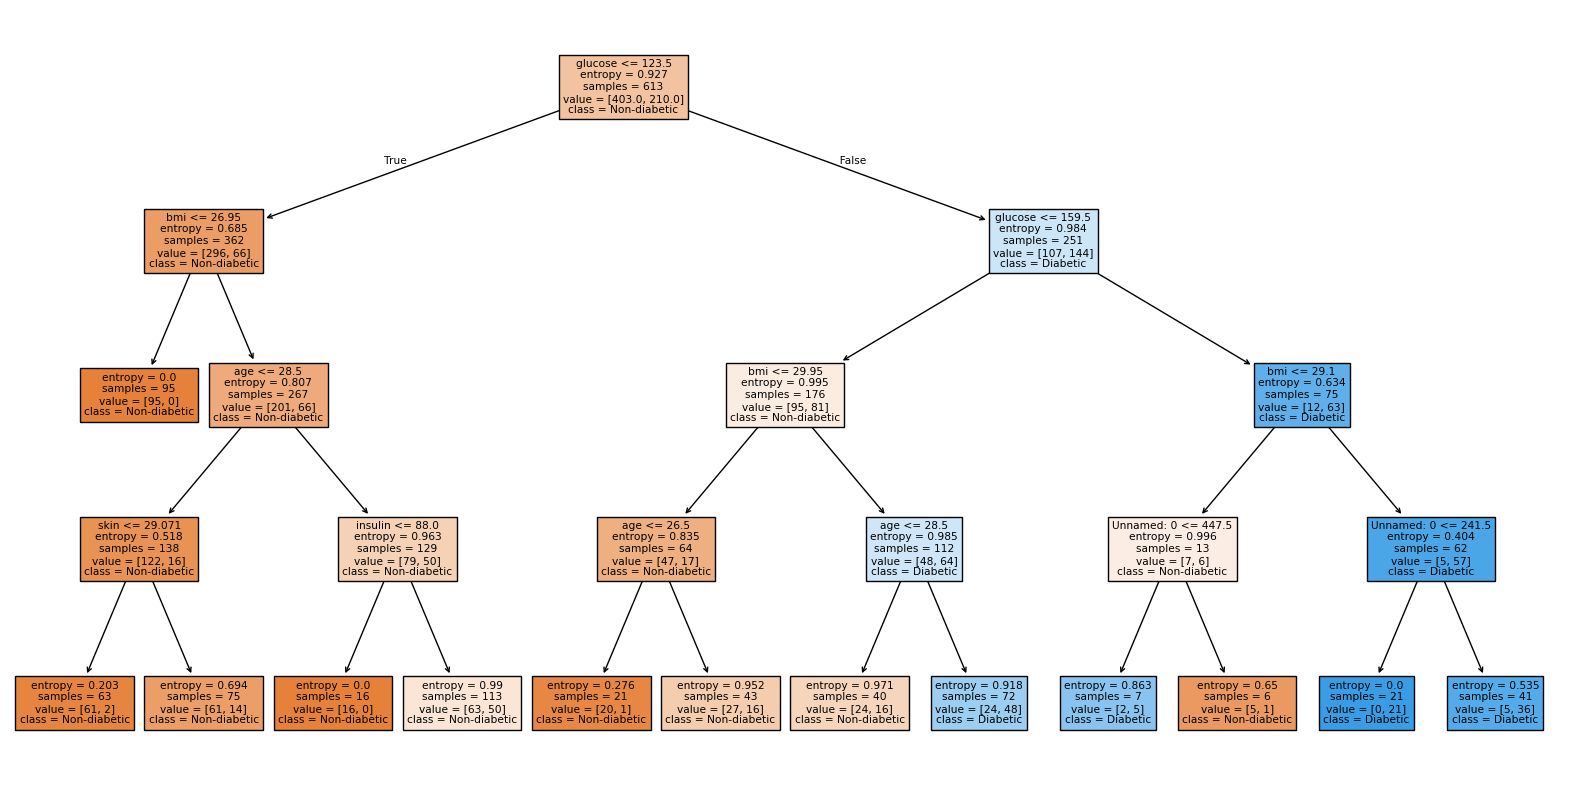

In [6]:
plt.figure(figsize=(20, 10))
tree.plot_tree(algo, filled=True,feature_names=dbts_new.columns[:-1], class_names=['Non-diabetic', 'Diabetic'])
plt.show()

## Performance Metrics of learning algorithm

Evaluate the predictive accuracy of a model

#### Create Confusion Matrix to compare the number of predicted values against actual labeled value


In [7]:
Y_Prdct = algo.predict(X_test)
print(f"Predictions:\n{Y_Prdct}")

Predictions:
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 1 0 0]


In [8]:
confusion_matrix = metrics.confusion_matrix(Y_test, Y_Prdct)
print("Confusion Matrix:\n", confusion_matrix)
print("Shape of Confusion Matrix:", confusion_matrix.shape)

Confusion Matrix:
 [[85 12]
 [25 32]]
Shape of Confusion Matrix: (2, 2)


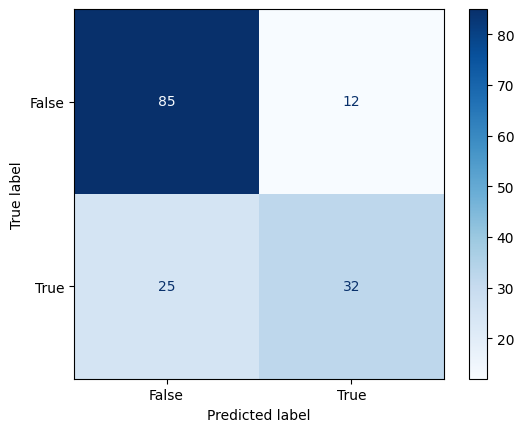

In [9]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

## Data Interpretation of Confusion Matrix

**True negative (TN) and positive (TP)**: Out of the total test dataset the decision tree model predicted 85 data rows as true negative and 32 data rows as true postive which means the actual labels matched the predicted labels for real diabetic and no diabetic labels.

**False Positive**: Actually the sample diabetic label is false/non-diabetic but the model predicts the sample as true or diabetic. So for the 12 non diabetic samples the model predicted all of them as diabetic which isnt the case. 

**False Negative**: Actually the sample diabetic label is true/diabetic but the model predicts the sample as fasle or non- diabetic. So for the 25 diabetic samples the model predicted all of them as non-diabetic which isnt the case.

### Accuracy = Number of correctly classified objects / Number of classified objects

- $ Accuracy = (TP + TN)\; /\; (TP + TN + FP + FN)$

#### Evaluate separately for each class

- $ Precision (p)= (TP )\; /\; (TP + FP)$
- $ Recall (r) = (TP )\; /\; (TP + FN)$

### Maximize

- $ F-measure (F) = 2rp \;/ \;(r+p)$


In [10]:
print("Classification Report:")
print(metrics.classification_report(Y_test, Y_Prdct))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        97
           1       0.73      0.56      0.63        57

    accuracy                           0.76       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.76      0.75       154

